#Mount Google Drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#Aim

The aim of this notebook is to run through week two's programming exercise from the deeplearning.ai course on [Coursera.com](https://www.coursera.org/learn/neural-networks-deep-learning/lecture/SmIbQ/explanation-of-logistic-regression-cost-function-optional) with a few tweaks to the code to make the notebook a bit more interesting. I will be implementing the concepts taught in the lessons on order to secure them in my mind as well as to have a resource that I can refer to in future when I wish to look somehting up related to the subject.

This notebook is being created using Google Colab in order to make use of their free GPU runtime option as well as because this allows me to access these notebooks from whatever computer I happen to be working from as they can be easily accessed through my google drive.

#Logistic Regression with a Neural Network mindset

- Build the general architecture of a learning algorithm, including:
  - Initializing parameters
  - Calculating the cost function and its gradient
  - Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function, in the right order.

#1 - Import Packages and data-set

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [0]:
# Set the paths for the data sets to be used located in the same folder of my google drive
# Note that by default we are in /content and so this has to be removed from the full path obtained from the Files manu

train_path = "drive/My Drive/Data Science/deeplearning.ai/01-Neural-Networks-and-Deep-Learning/Week 2/Logistic Regression with a Neural Network Mindset/train_catvnoncat.h5"
test_path = "drive/My Drive/Data Science/deeplearning.ai/01-Neural-Networks-and-Deep-Learning/Week 2/Logistic Regression with a Neural Network Mindset/test_catvnoncat.h5"

In [0]:
def load_dataset():
    train_dataset = h5py.File(train_path, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_path, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
  

data_set = load_dataset()

#2 - Overview of the Problem set

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

We will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

In [0]:
# Import the dataset into its component parts
# Fit the suffix _orig to each of the data sets as they will be renamed after preprocessing

train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = data_set

y = [0], it's a 'non-cat' picture.
y = [0], it's a 'non-cat' picture.
y = [1], it's a 'cat' picture.
y = [0], it's a 'non-cat' picture.


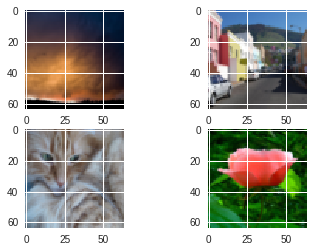

In [0]:
# View some images from the dataset

index_list = [0,1,2,3]

for index in index_list:
  ax=plt.subplot(2, 2, index+1)
  ax.imshow(train_set_x_orig[index])
  print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Let's find the values for:

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

In [0]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


Let's now reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px $*$ num_px $*$ 3, 1).

A trick to do this is:

X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X

In [0]:
# Proof of the trick

test_matrix = np.zeros((1,2,3,4))

print(test_matrix.shape)

test_matrix_flattened = test_matrix.reshape(test_matrix.shape[0],-1).T

print(test_matrix_flattened.shape)

(1, 2, 3, 4)
(24, 1)


In [0]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T  
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize the dataset, meaning that we substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

In [0]:
# Lets standardise the dataset

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

Common steps for pre-processing a new dataset are:

1. Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
2. Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
3. "Standardize" the data

#3 - General Architecture of the learning algorithm

It's time to design a simple algorithm to distinguish cat images from non-cat images.

**Key steps:** 

In this exercise, we will carry out the following steps:

- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude



Mathematical expression of the algorithm:

For one example $x^{(i)}$: $$z^{(i)} = w^T x^{(i)} + b \tag{1}$$$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples: $$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

#4 - Building the parts of our algorithm

The main steps for building a Neural Network are:

1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
  - Calculate current loss (forward propagation)
  - Calculate current gradient (backward propagation)
  - Update parameters (gradient descent)
 
 
You often build 1-3 separately and integrate them into one function we call model().

##4.1 - Helper functions

Let's implement sigmoid() : $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. 

In [0]:
def sigmoid(z):
  """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
  """
  
  s = 1/(1 + np.exp(-z))
  
  return s

In [0]:
# Test the function

print (f"sigmoid([0, 2]) = {sigmoid(np.array([0,2]))}")

sigmoid([0, 2]) = [0.5        0.88079708]


##4.2 - Initializing parameters

Implement parameter initialization.

In [0]:
def initialize_with_zeros(dim):
  """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
  """
  w = np.zeros((dim,1))
  b = 0
  
  # Make assertions to check for errors
  assert(w.shape == (dim,1))
  assert(isinstance(b, float) or isinstance(b, int))
  
  return w, b
  

In [0]:
# Test the function

dim = 2
w, b = initialize_with_zeros(dim)

print(f"w is: {w}")
print(f"b is: {b}")

w is: [[0.]
 [0.]]
b is: 0


##4.3 - Forward and backward propagation

Now that your parameters are initialized, we can implement the "forward" and "backward" propagation steps for learning the parameters.

 Let's implement a function propagate() that computes the cost function and its gradient.

**Forward Propagation:**

- Get X
- Compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- Calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas we will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [0]:
def propagate(w, b, X, Y):
  """
    Implement the cost function and its gradient for the propagation

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
  """
  m = X.shape[1] # Number of examples in the training set
  
  A = sigmoid(np.dot(w.T, X) + b) 
  cost = -1/m * np.sum(Y * np.log(A) + (1- Y) * np.log(1-A))
  
  dw = 1/m * np.dot(X, (A - Y).T)
  db = 1/m * np.sum(A - Y)
  
  assert(dw.shape == w.shape)
  assert(db.dtype == float)
  cost = np.squeeze(cost)
  assert(cost.shape == ())
    
  grads = {"dw": dw,
           "db": db}
  
  return grads, cost

In [0]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
      
grads, cost = propagate(w, b, X, Y)
print(f"dw = {grads['dw']}")
print(f"db = {grads['db']}")
print(f"cost = {cost}")

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


##4.4 - Optimization

- We have initialized your parameters.
- We are also able to compute a cost function and its gradient.
- Now, we want to update the parameters using gradient descent.

**Let's write down the optimization function:**

The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [0]:
def optimise(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  """
  This function optimizes w and b by running a gradient descent algorithm
    
  Arguments:
  w -- weights, a numpy array of size (num_px * num_px * 3, 1)
  b -- bias, a scalar
  X -- data of shape (num_px * num_px * 3, number of examples)
  Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
  num_iterations -- number of iterations of the optimization loop
  learning_rate -- learning rate of the gradient descent update rule
  print_cost -- True to print the loss every 100 steps

  Returns:
  params -- dictionary containing the weights w and bias b
  grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
  costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

      1) Calculate the cost and the gradient for the current parameters. Use propagate().
      2) Update the parameters using gradient descent rule for w and b.
  """
  costs = []
  
  for i in range(num_iterations):

    # Forward propagate to calculate cost and gradients
    grads, cost = propagate(w, b, X, Y)
    
    # Extract derivatives
    dw = grads["dw"]
    db = grads["db"]
    
    # Back propagate
    w = w - learning_rate * dw
    b = b - learning_rate * db
    
    # Append the cost to the costs list to be plotted later
    costs.append(cost)
    
    # Print the cost every 100 steps
    if print_cost and i % 100 == 0:
      print(f"Cost after iteration {i}: {cost}")
      
    # Save params in dict
    params = {"w": w,
              "b": b}
    
    # Save gradients in dict
    grads = {"dw": dw,
             "db": db}
    
    
  return params, grads, costs

In [0]:
# Test the optimasation function

params, grads, costs = optimise(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


##4.5 - Prediction

The  function above will output the learned w and b which we are able to use w and b to predict the labels for a dataset X. 

Let's implement the predict() function. 

There are two steps to computing predictions:

Calculate $\hat{Y} = A = \sigma(w^T X + b)$

We'll convert the entries of A into 0 (if activation <= 0.5) or 1 (if activation > 0.5) and store the predictions in a vector Y_prediction. 

In [0]:
def predict(w, b, X):
  """
  Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
  Arguments:
  w -- weights, a numpy array of size (num_px * num_px * 3, 1)
  b -- bias, a scalar
  X -- data of size (num_px * num_px * 3, number of examples)

  Returns:
  Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
  """
  
  m = X.shape[1]
  Y_predictions = np.zeros((1,m))
  w = w.reshape(X.shape[0], 1)
  
  # Calculate the probablities of a cat being in the pictture
  A = sigmoid(np.dot(w.T, X))
  
  # If probability is greater than 0.5 predict 1 otherwise predict 0
  Y_predictions = (A > 0.5).astype(int)
  
  assert(Y_predictions.shape == (1, m))
  
  return Y_predictions

In [0]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1 1 0]]


#5 - Merge all functions into a model

Wewill now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Let's implement the model function using the following notation:

- Y_prediction_test for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- w, costs, grads for the outputs of optimize()

In [0]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
  """
  Builds the logistic regression model by calling the function we've implemented previously
    
  Arguments:
  X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
  Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
  X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
  Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
  num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
  learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
  print_cost -- Set to true to print the cost every 100 iterations

  Returns:
  d -- dictionary containing information about the model.
  """
  
  # Initialise w and b to zeros
  dim = X_train.shape[0]
  w, b = initialize_with_zeros(dim)
  
  # Implement gradient descent
  params, grads, costs = optimise(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
  
  # Retrieve params
  w = params["w"]
  b = params["b"]
  
  # Predict labels for the train and test sets
  Y_prediction_train = predict(w, b, X_train)
  Y_prediction_test = predict(w, b, X_test)
  
  # Determine the train and test errors
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
  d = {"costs": costs,
       "Y_prediction_test": Y_prediction_test, 
       "Y_prediction_train" : Y_prediction_train, 
       "w" : w, 
       "b" : b,
       "learning_rate" : learning_rate,
       "num_iterations": num_iterations}

  return d

In [0]:
# Run the model on the dataset

d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.5845083636993086
Cost after iteration 200: 0.46694904094655476
Cost after iteration 300: 0.37600686694802077
Cost after iteration 400: 0.3314632893282512
Cost after iteration 500: 0.30327306747438293
Cost after iteration 600: 0.27987958658260487
Cost after iteration 700: 0.26004213692587574
Cost after iteration 800: 0.2429406846779662
Cost after iteration 900: 0.22800422256726063
Cost after iteration 1000: 0.21481951378449635
Cost after iteration 1100: 0.20307819060644985
Cost after iteration 1200: 0.19254427716706862
Cost after iteration 1300: 0.18303333796883503
Cost after iteration 1400: 0.17439859438448874
Cost after iteration 1500: 0.16652139705400335
Cost after iteration 1600: 0.15930451829756614
Cost after iteration 1700: 0.15266732471296504
Cost after iteration 1800: 0.1465422350398234
Cost after iteration 1900: 0.1408720757031016
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


##Commentary

For the above we can see:

- The training accuracy is now 99%. This is good as it shows us that the model is working i.e. accuracy is increasing over the iterations.
- Test accuracy is 70%. This is also positive as although the accuracy could stand to be far higher, we can see that our model is at least improving and is generalising to some degree. The less than amazing accuracy value also speaks to the fact that we are working with a small sample size.
- Train accuracy is far higher than test accuracy. This tells us that the model is overfitting which is understandable given the lack of cross validations or really any other method of managing overfitting.
- The cost has steadily decreased over the iterations. We will plot a graph of this trend in order to explore this in a bit more detail.

Text(0.5, 1.0, 'Learning rate =0.005')

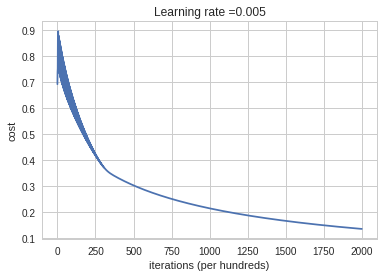

In [0]:
# Plot the cost as a function of the iterations

plt.style.use('seaborn-whitegrid')
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))

We can see that as the iterations increased the cost decreased and so we can determine that our model is fitting closer and closer to the training data with each iteration. It should be noted, however, that as we have shown above, there is a degree of overfitting being experienced and so even though it may appear that increasing the iterations would improve our model, it very well may overfit even more and actually decrease our test accuracy.

Let's test this by running the model 5 times with different num_iterations arguments comparing the accuracies.

In [0]:
d1 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.005, print_cost = False)
d2 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1200, learning_rate = 0.005, print_cost = False)
d3 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1400, learning_rate = 0.005, print_cost = False)
d4 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1600, learning_rate = 0.005, print_cost = False)
d5 = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1800, learning_rate = 0.005, print_cost = False)

train accuracy: 96.65071770334929 %
test accuracy: 72.0 %
train accuracy: 97.12918660287082 %
test accuracy: 70.0 %
train accuracy: 97.60765550239235 %
test accuracy: 70.0 %
train accuracy: 98.08612440191388 %
test accuracy: 70.0 %
train accuracy: 98.56459330143541 %
test accuracy: 70.0 %


**Result:**

Thus we can see that our test accuracy was actualy the highest (at 72%) for the model with only 1000 iterations and that accuracy hit 70% at 1200 iterations and then held at that accuracy going forward.

This proves to show that the model generalised better at 1000 iterations and that even though the cost decreased as iterations increased, this did not necessarily increase the prediction accuracy of the model which is the whole purpose of the model.

#6 - Further analysis

**Choice of learning rate**

In order for Gradient Descent to work we must choose the learning rate wisely. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. 

learning rate is: {str(i)}
train accuracy: 98.56459330143541 %
test accuracy: 70.0 %

-------------------------------------------------------

learning rate is: {str(i)}
train accuracy: 86.60287081339713 %
test accuracy: 62.0 %

-------------------------------------------------------

learning rate is: {str(i)}
train accuracy: 96.65071770334929 %
test accuracy: 72.0 %

-------------------------------------------------------

learning rate is: {str(i)}
train accuracy: 66.02870813397129 %
test accuracy: 36.0 %

-------------------------------------------------------



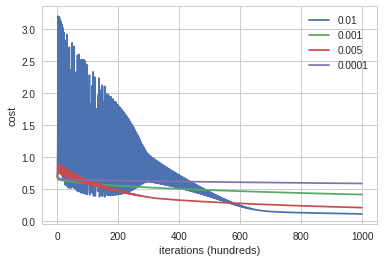

In [0]:
learning_rates = [0.01, 0.001, 0.005, 0.0001]

models = {}

for i in learning_rates:
    print ("learning rate is: {str(i)}")
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper right')
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Results:**

As we can see:
- The cost for the highest learning rate of 0.01 jumped around a lot at first as is expected due to the fact that it takes bigger steps. This model ended up with the lowest cost which indicates that the other models had not yet fully converged at the end of the iterations. This can also be shown by the gradient of the above lines at the end where the learning rate of 0.01 has the "flattest" line.
- As we continue through the other learning rates we see a trend of the volitility decreasing (especially over the first 400 iterations) as the learning rate decreases, the gradient of the line becomes flatter (indicating the smaller jump per iteration) and we see that all of these lines are further from convergence than the model with the learning rate of 0.01.

When comparing the accuracy scores of the models we can determine the following:
- A lower cost does not necessarily translate to a higher test accuracy, although it does to a higher train accuracy.
- Besides the model with the learning rate of 0.05 (which seems to be the sweet spot here), accuracy decreased as the learning rate was lowered which is due to the fact that the models did not have enough iterations to properly fit the weights to the data.

#7 - Let's test the algorithm with our own images

In [0]:
# Import images from google drive

image1 = "drive/My Drive/Data Science/deeplearning.ai/01-Neural-Networks-and-Deep-Learning/Week 2/Logistic Regression with a Neural Network Mindset/cat_images/latest_cat.jpeg"
image2 = "drive/My Drive/Data Science/deeplearning.ai/01-Neural-Networks-and-Deep-Learning/Week 2/Logistic Regression with a Neural Network Mindset/cat_images/tree.jpeg"


images = [image1, image2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


y = 1, the algorithm predicts a "cat" picture.
y = 1, the algorithm predicts a "cat" picture.


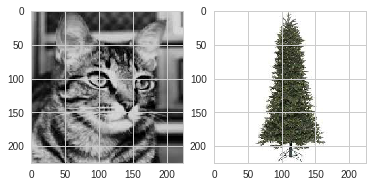

In [69]:
# Preprocess the image to fit the algorithm and make predictions

dim = train_set_x.shape[0]
w, b = initialize_with_zeros(dim)
params, grads, costs = optimise(w, b, train_set_x, train_set_y, num_iterations=1000, learning_rate=0.005, print_cost = False)

for i, image in enumerate(images):
  fname = image
  image = ndimage.rotate(np.array(ndimage.imread(fname, flatten=False)), 0)
  my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
  my_predicted_image = predict(params["w"], params["b"], my_image)

  ax = plt.subplot(1,2, i+1)
  ax.imshow(image)
  print("y = " + str(np.squeeze(my_predicted_image)) + ", the algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

**Results:**:

As we can see, the model is far from perfect but this will improve as I update the model in future.